In [1]:
import os, numpy as np, logging
from pyapphot.apphot import aperture_phot as apphot
os.chdir('test_data/jcbt/')

Ginga not installed, use other viewer, or no viewer


# Aperture photometry
You can perform aperture photometry with the class 'aperture_phot'. 
### Input parameters:
1. Various PSF properties are required to be passed to this class. For this purpose you can use the 'starPSF' class and pass the result directly or the pickle file containing the result to this class. 
2. Another important input parameter is the configuration file. This file should contain all the information about the observation and the detector. Many information are already stored in the header section of the fits file. Information about Which header corresponds to what parameter has to be filled in the configuration file under the 'header_keys' section. If any value of a parameter is directly known that can be stored under the 'values' section of the config file. An example config file can be found in root/pyapphot-master/pyapphot/config folder named 'HFOSC2'. This file corresponds to the instrument HFOSC2 at the backend of the 2m Himalayan Chandra Telescope at Hanle, India. This file name has to be passed to this class. 
3. Other input parameters are apertures (list or tuple), min and max allowable counts, sky position w.r.t. the PSF etc.

In [5]:
phot = apphot(image='@photimlist', coordfile='new_bf_07jan2019_wasp50_R_030.coo', calculate=True, saveto='photdat.pkl', instrument='JCBT_UKATC', aperture=range(15,40), skypos=(8,7), imstat='imstat.pkl')

photop002.mag


In [6]:
phot.t

array(['17:57:08.939', '17:59:56.810', '18:02:44.808', '18:05:33.058'],
      dtype='<U12')

# Differential photometry
You can perform basic differential photometry using the 'differential_photometry' of the 'aperture_phot' class.

In [15]:
phot = apphot(loadfrom='photdat.pkl',)
phot.set_t('date-obs')
# print(phot.ferr/phot.flux)
t,dflux,dferr,dmag,dmerr = phot.differential_photometry(aperture=18)
t,dflux

(array([2458491.24802013, 2458491.24996308, 2458491.2519075 ,
        2458491.25385484]), array([[1.47595468],
        [1.49457023],
        [1.48638558],
        [1.47869627]]))

<IPython.core.display.Javascript object>


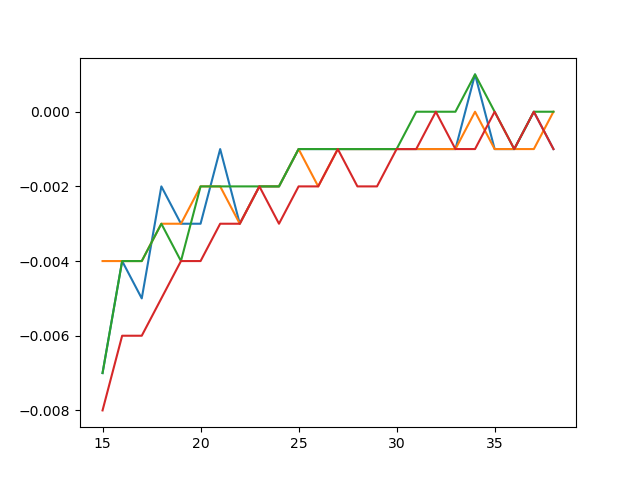

array([[-0.007, -0.004, -0.005, -0.002, -0.003, -0.003, -0.001, -0.003,
        -0.002, -0.002, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001,
        -0.001, -0.001, -0.001,  0.001, -0.001, -0.001,  0.   , -0.001],
       [-0.004, -0.004, -0.004, -0.003, -0.003, -0.002, -0.002, -0.003,
        -0.002, -0.002, -0.001, -0.002, -0.001, -0.001, -0.001, -0.001,
        -0.001, -0.001, -0.001,  0.   , -0.001, -0.001, -0.001,  0.   ],
       [-0.007, -0.004, -0.004, -0.003, -0.004, -0.002, -0.002, -0.002,
        -0.002, -0.002, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001,
         0.   ,  0.   ,  0.   ,  0.001,  0.   , -0.001,  0.   ,  0.   ],
       [-0.008, -0.006, -0.006, -0.005, -0.004, -0.004, -0.003, -0.003,
        -0.002, -0.003, -0.002, -0.002, -0.001, -0.002, -0.002, -0.001,
        -0.001,  0.   , -0.001, -0.001,  0.   , -0.001,  0.   , -0.001]])

In [18]:
%matplotlib notebook
fig, ax = plt.subplots()
phot.plot_aperture_growth_curve(objects=[2], ax=ax)

<IPython.core.display.Javascript object>


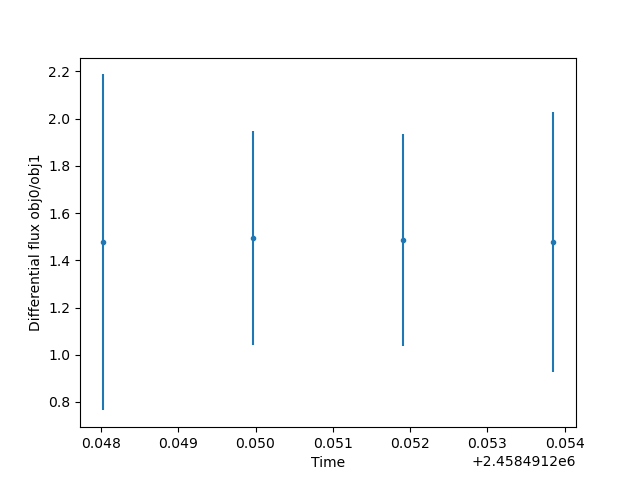

Text(0, 0.5, 'Differential flux obj0/obj1')

In [17]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.figure()
plt.errorbar(t,dflux[:,0],dferr[:,0], fmt='.')
plt.xlabel('Time')
plt.ylabel('Differential flux obj0/obj1')